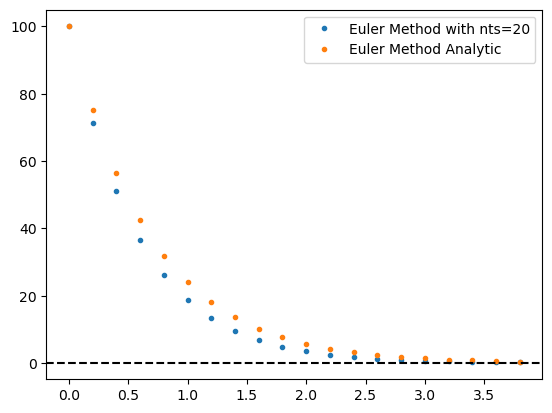

In [21]:
import numpy as np
import pylab as p

tau = 0.7        # mean lifetime
N0 = 100.0 # initial number of nuclei

tmin = 0.0
tmax = 4.0

nts=20

# Create an array to hold the times
t_array = np.linspace(tmin, tmax, nts, endpoint=False)  
# NOTE ENDPOINT HERE: can you figure out what it does? 

dt = t_array[1] - t_array[0]  
# This is an easy way to define dt that is not error prone
# Should match (tmax-tmin)/nts if you're careful about "endpoint"
        
#print("t_array:",t_array)  # See what it looks like

# Empty array to hold the number of nuclei
N_array          = np.zeros( nts )

# THIS IS THE ACTUAL ALGORITHM PART

# Set the initial condition
N_array[0] = N0

#fill the rest of the solution, step by step
for it in range(0, len(t_array)-1 ): # Note the -1: what happens if we don't have it?
    
    N_array[it+1] = N_array[it] + (-dt/tau) * N_array[it]
    
    # Some output so we can watch!
    #print('at time t = {:.3f}, N = {:.3f}'.format(t_array[it+1],N_array[it+1]))

N_true = np.zeros([len(t_array)])
i = 0
while i < len(t_array):
    N_true[i] = N0 * np.exp(-t_array[i] / tau)
    i += 1

p.plot(t_array, N_array, '.', label="Euler Method with nts="+str(nts))
p.plot(t_array, N_true, '.', label="Euler Method Analytic")

p.legend()
p.axhline(0.0, color='k', linestyle='--')
p.show()

[0.2    0.1    0.05   0.025  0.0125] [-0.49271727 -0.25739485 -0.13085394 -0.06589807 -0.03305875]


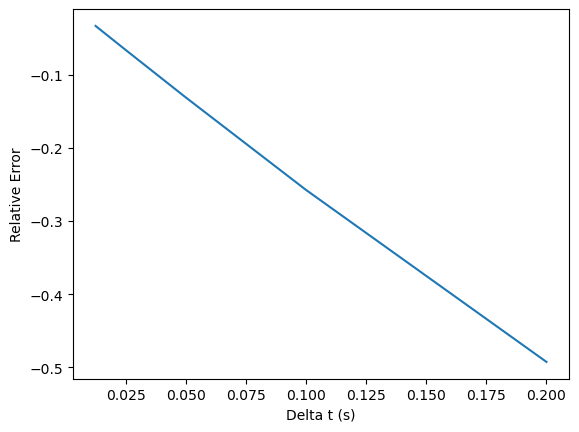

In [2]:
import numpy as np
import pylab as p

tau = 0.7        # mean lifetime
N0 = 100.0 # initial number of nuclei

tmin = 0.0
tmax = 4.0

nts = [20,40,80,160,320]
N_true = N0 * np.exp(-4 / tau)
N_array = np.zeros([len(nts)])
dt = np.zeros([len(nts)])

i = 0
while i < len(nts):
    t_array = np.linspace(tmin, tmax, nts[i], endpoint=False)  
    
    dt[i] = t_array[1] - t_array[0]  
    
    N_subarray = np.zeros(nts[i])
    N_subarray[0] = N0
    
    for it in range(0, len(t_array)-1 ): # Note the -1: what happens if we don't have it?
        
        N_subarray[it + 1] = N_subarray[it] + (-dt[i] / tau) * N_subarray[it]
        if it == len(t_array) - 2:
            N_array[i] = N_subarray[len(t_array) - 1]
        
    i += 1

print(dt, (N_array - N_true) / N_true)
p.plot(dt, (N_array - N_true) / N_true)
p.xlabel('Delta t (s)')
p.ylabel('Relative Error')
p.show()

This is a linear relationship, which is good. Moving on to HW 4.1; below are the first 3 parts and some of the 4th part of
this homework. The number above the graph is the value of y at almost 8 seconds. The true value at 8 seconds is -21.6 meters.

-21.53392627203319


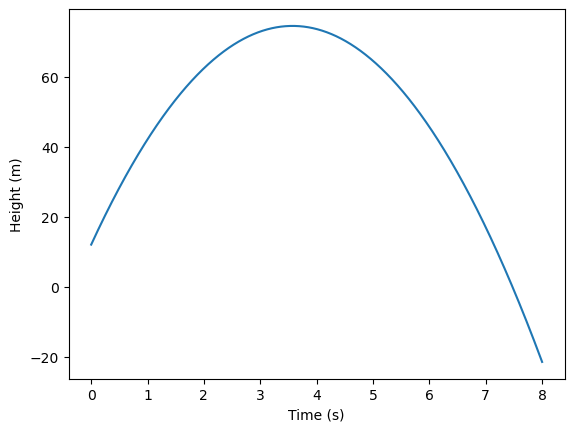

In [65]:
import numpy as np
import pylab as p

nts = 10000
y0 = 12
v0 = 35
g = 9.8

def freefall(t, y0, v0, g):
    t_array = np.linspace(0, t, nts, endpoint=False)  
    dt = t_array[1] - t_array[0]
        
    y = np.zeros(nts)
    y[0] = y0
    v = np.zeros(nts)
    v[0] = v0
        
    for it in range(0, len(t_array) - 1): # Note the -1: what happens if we don't have it?
    
        v[it + 1] = v[it] - dt * g
        y[it + 1] = y[it] + dt * v[it]
        
freefall(8, y0, v0, g)
print(y[len(y) - 1])
p.plot(t_array, y)
p.xlabel('Time (s)')
p.ylabel('Height (m)')
p.show()

Now I will do the approximate - true / true vs nts graph requested:

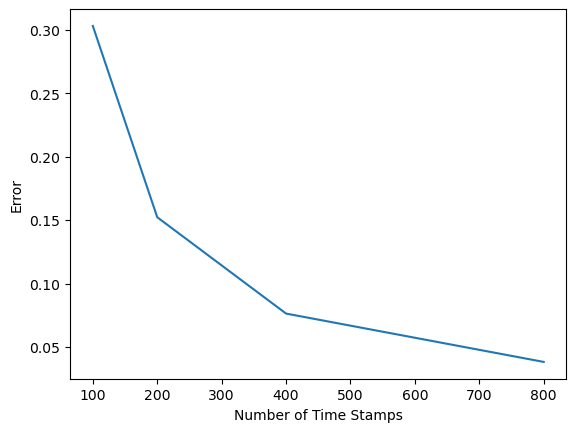

In [90]:
%reset -f
import numpy as np
import pylab as p

nts = 100
y0 = 12
v0 = 35
g = 9.8
t = 8

approx = np.zeros(4)
err = np.zeros(4)

def freefall(t, y0, v0, g):
    t_array = np.linspace(0, t, nts, endpoint=False)  
    dt = t_array[1] - t_array[0]
        
    y = np.zeros(nts)
    y[0] = y0
    v = np.zeros(nts)
    v[0] = v0
        
    for it in range(0, len(t_array) - 1): # Note the -1: what happens if we don't have it?
    
        v[it + 1] = v[it] - dt * g
        y[it + 1] = y[it] + dt * v[it]

    return y[len(y) - 1]

i = 0
while i < 4:
    approx[i] = freefall(t, y0, v0, g)
    err[i] = (approx[i] + 21.6) / 21.6
    nts *= 2
    i += 1

nts_arr = [100, 200, 400, 800]

p.plot(nts_arr, err)
p.xlabel('Number of Time Stamps')
p.ylabel('Error')
p.show()

Error does seem to cut in half as NTS doubles, which is good. Next up is integrating the drag into the code, which is very
straight forward:

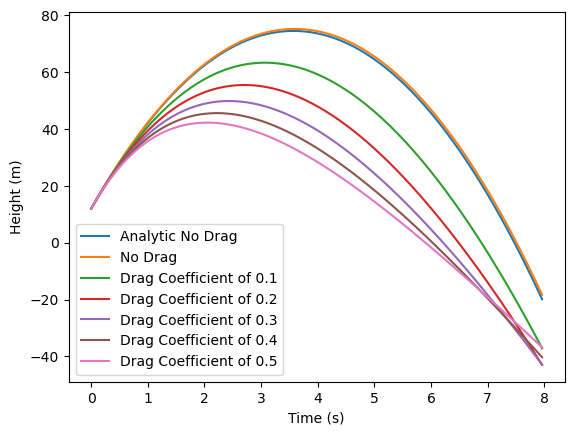

In [97]:
import numpy as np
import pylab as p

nts = 200
y0 = 12
v0 = 35
g = 9.8
beta = 0
t = 8

t_array = np.linspace(0, t, nts, endpoint=False)  
dt = t_array[1] - t_array[0]

def freefall(t, y0, v0, g, beta):
    
    for it in range(0, len(t_array) - 1): # Note the -1: what happens if we don't have it?
    
        v[it + 1] = v[it] - dt * (g + beta * v[it])
        y[it + 1] = y[it] + dt * v[it]

    return y

#THIS PART DOES THE ANALYTIC NO DRAG CALCULATION
ytrue = np.zeros(nts)
i = 0
while i < len(t_array):
    ytrue[i] = y0 + v0 * t_array[i] - 0.5 * g * pow(t_array[i], 2)
    i += 1
p.plot(t_array, ytrue, label="Analytic No Drag")
#END PART

#THIS PART MAKES THE FREE FALL APPROXIMATION WITH DIFFERENT BETAS AS LABELED IN THE CHART
while beta <= 0.5:
    y = np.zeros(nts)
    y[0] = y0
    v = np.zeros(nts)
    v[0] = v0
    y = freefall(8, y0, v0, g, beta)
    if beta == 0:
        p.plot(t_array, y, label="No Drag")
    else:
        p.plot(t_array, y, label="Drag Coefficient of "+str(beta))
    beta = round(beta + 0.1, 1)

p.legend()    
p.xlabel('Time (s)')
p.ylabel('Height (m)')
p.show()

This is precisely what I would expect, though I will note a few things. I am aware that technically the velocity I started with should be going down toward the ground an not up, considering it is in freefall, but I choose not to do that because this chart is prettier and gets the same point across. Notice that for nts = 200, which I chose because it's really close to the analytic case but still differentiable from it, the no drag is just slightly overshooting the real values, which makes sense since the error is piling up later on when the change in slope is downward, so it should overshoot. I better choice for nts would be something larger, like 10000 or even 100000, but this displays how the error looks.